In [2]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
import torchvision
import cv2


In [3]:
path_config="gpu.config.yml"
cfg = OmegaConf.load(path_config)
analyzer = FaceAnalyzer(cfg.analyzer)
video_path = "output.mp4"
video = cv2.VideoCapture(video_path)

{"asctime": "2023-12-19 16:34:52,387", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2023-12-19 16:34:52,387", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2023-12-19 16:34:52,476", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2023-12-19 16:34:55,221", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2023-12-19 16:34:55,227", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2023-12-19 16:34:55,228", "levelname": "INFO", "message": "Initializing FacePredictor align"}
{"asctime": "2023-12-19 16:34:55,295", "levelname": "INFO", "message": "Initializing BaseUtilizer objects"}
{"asctime": "2023-12-19 16:34:55,295", "levelname": "INFO", "message": "Initializing BaseUtilizer align"}
{"asctime": "2023-12-19 16:34:55,311", "levelname": "INFO", "message": "Initializing BaseUtilizer draw_boxes"}
{"asctime": "2023-12-19 16:34:55,312", "levelname": "INFO", "m

In [9]:
preds = {}
if not video.isOpened():
    print("Error opening video file")
    exit()

fps = video.get(cv2.CAP_PROP_FPS)

# Set interval to capture frames (every second)
frame_interval = int(fps)  # Change this value to alter frame extraction frequency
frame_count = 0

while True:
    ret, frame = video.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    if not ret:
        break

    # Extract frame at every 'frame_interval'
    if frame_count % frame_interval == 0:
        response = analyzer.run(
                image=frame,
                batch_size=8,
                include_tensors=True,
                return_img_data=True,
                fix_img_size = True
            )
       

    frame_count += 1
    
video.release()


{"asctime": "2023-12-19 16:02:43,092", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2023-12-19 16:02:43,092", "levelname": "INFO", "message": "Reading image"}
{"asctime": "2023-12-19 16:02:43,095", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2023-12-19 16:02:43,150", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2023-12-19 16:02:43,151", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2023-12-19 16:02:43,151", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2023-12-19 16:02:43,151", "levelname": "INFO", "message": "Running FacePredictor: align"}
{"asctime": "2023-12-19 16:02:43,153", "levelname": "INFO", "message": "Utilizing facial features"}
{"asctime": "2023-12-19 16:02:43,153", "levelname": "INFO", "message": "Running BaseUtilizer: align"}
{"asctime": "2023-12-19 16:02:43,154", "levelname": "INFO", "message": "Running BaseUtilizer: draw_boxes"}
{"asctime": "2023-12-19 16:02:43

KeyboardInterrupt: 

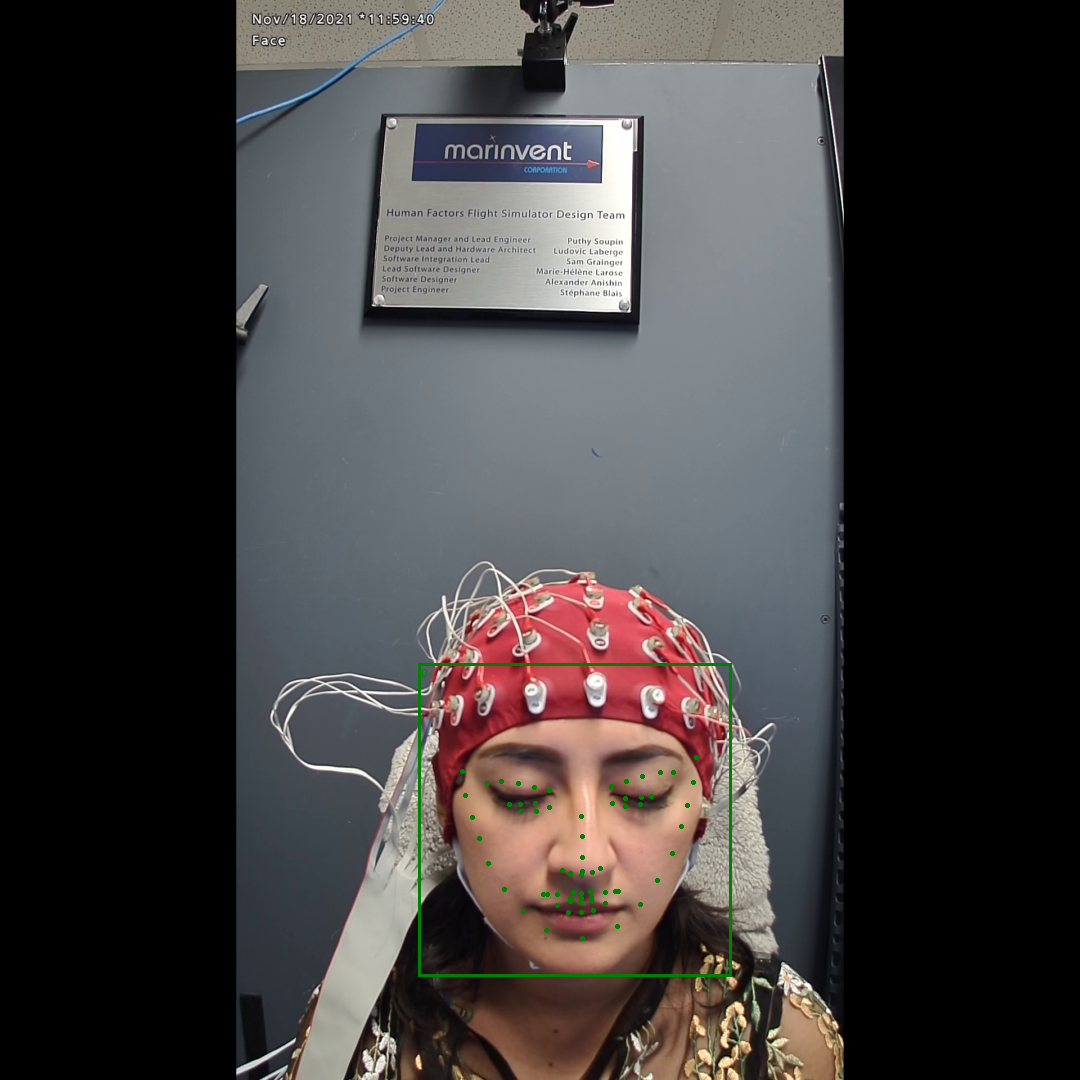

In [10]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image